In [11]:
# Importing all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
# Reset the PN sequence generator.
seed = 42
np.random.seed(seed)

### Gerando os dados de 2 classes.

In [3]:
# Number of examples.
N = 1000

# Create a 2-class dataset for classification.
X, y = make_circles(n_samples=N, factor=.5, noise=.05, random_state=seed)

### Plotando as 2 classes.

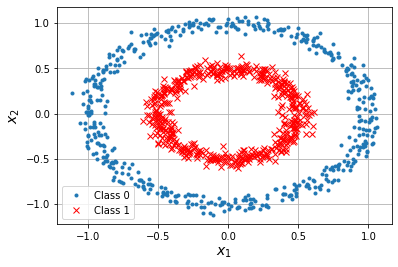

In [4]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

fig = plt.figure()
plt.plot(X[idx0,0], X[idx0,1], '.', label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.grid()
plt.show()

### Dividindo os dados em conjuntos de treinamento e validação.

In [5]:
# Split array into random train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)

### Alterando as matrizes de atributos de treinamento e validação para que implementem o formato apropriado da função discriminante.

In [6]:
X_train = X_train**2

X_test = X_test**2

### Treinando o classificador.

In [7]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

### Calculando a acurácia do classificador.

In [8]:
# Calculate accuracy of class predictions.
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print('Acurácia:',acc)

Acurácia: 0.992


### Plotando as regiões de decisão.

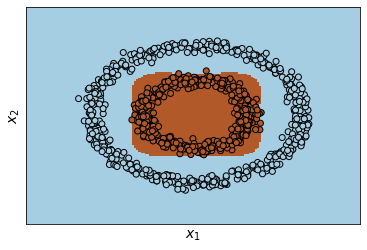

In [9]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# This attribute matrix must also follow the same shape 
# as the one created for the training.
attribute_matrix = np.c_[xx.ravel()**2, yy.ravel()**2]

Z = clf.predict(attribute_matrix)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Plotando a matriz de confusão.

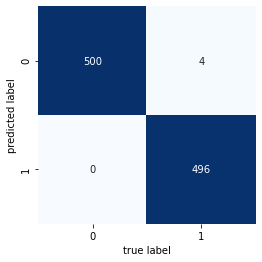

In [10]:
# Plot the confusion matrix
y_pred = clf.predict(X**2)

fig = plt.figure()
mat = confusion_matrix(y, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()